In [12]:
%pwd


'C:\\Users\\Eeshan'

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "white")
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Eeshan\Desktop\CSE\DSC_TP\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Few intuitive thoughts:
It appears that tenure, monthly and Total charges are the most significant parameters.
Second tier parameters could be Partner,Dependants; finally, parameters could be the types of services availed, and then,Senior Citizen status.


In [3]:
df = df.fillna(0)
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

In [4]:
churn_series = df['Churn'][df['Churn']=='Yes']
churn_num = len(churn_series)
perc_churn = (float(churn_num)/len(df.index))*100
perc_not = 100-perc_churn
print("churned percentage is",perc_churn)

churned percentage is 26.536987079369588


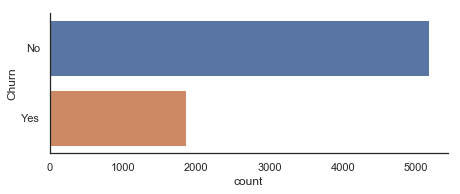

In [5]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5,)

In [23]:
'''sum = 0
avg = 1
for i in df.index:
    if(type(df.iloc[[i][TotalCharges]])!= 'str'):
        sum += df.iloc[[i][TotalCharges]]
        avg = sum/i
for i in df.index:
    if(type(df.iloc[[i][TotalCharges]])=='str'):
        df.iloc[[i][TotalCharges]]= avg'''

C:\Users\Eeshan\Anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [6]:
df['Churn'][df['Churn']== 'Yes']= 1
df['Churn'][df['Churn']=='No']= 0


C:\Users\Eeshan\Anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Eeshan\Anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\Eeshan\Anaconda3\envs\envname\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


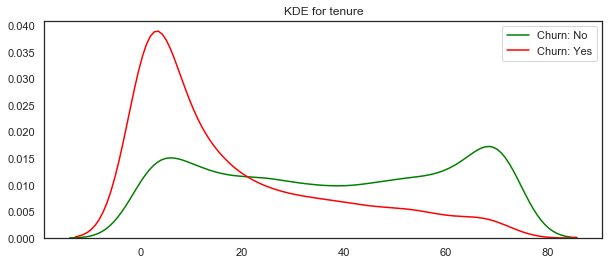

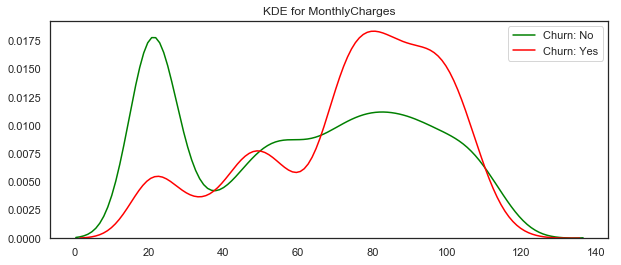

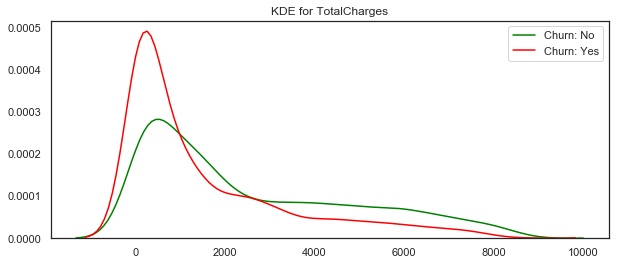

In [7]:
def kdeplot(param):
    plt.figure(figsize=(10, 4))
    plt.title("KDE for {}".format(param))
    ax0 = sns.kdeplot(df[param][df['Churn'] == 0], color= 'green', label= 'Churn: No')
    ax1 = sns.kdeplot(df[param][df['Churn'] == 1], color= 'red', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can conclude that:

1)Recent clients are more likely to churn\
2)Clients with higher MonthlyCharges are also more likely to churn\
3)Tenure and MonthlyCharges are probably important features


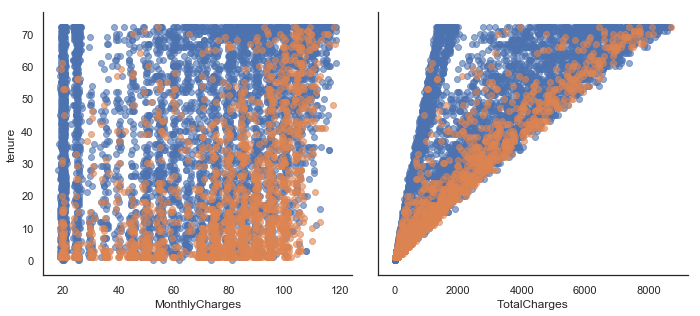

In [8]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

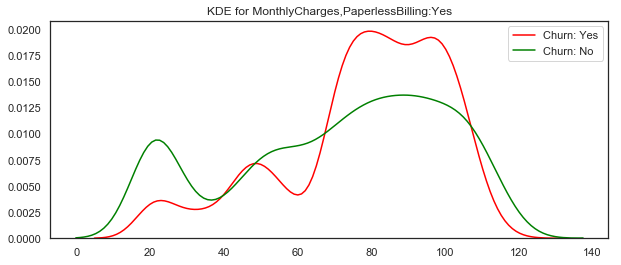

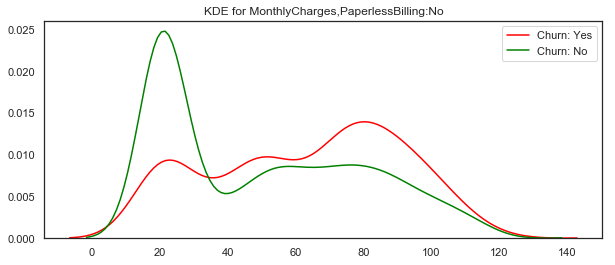

In [9]:
def kdegen(param,binc,choice):
    plt.figure(figsize = (10,4))
    plt.title("KDE for {},{}{}".format(param,binc,':'+ choice))
    ax0 = sns.kdeplot(df[param][(df[binc]== choice)&(df['Churn']== 1)],color = 'red',label ='Churn: Yes')
    ax1 = sns.kdeplot(df[param][(df[binc]== choice)&(df['Churn']== 0)],color = 'green',label = 'Churn: No')
kdegen(param = 'MonthlyCharges',binc = 'PaperlessBilling',choice = 'Yes')
kdegen(param = 'MonthlyCharges',binc = 'PaperlessBilling',choice = 'No')

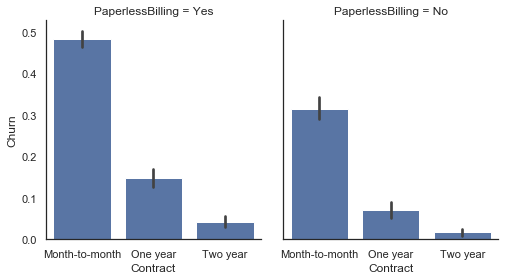

In [10]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "Churn", order= ['Month-to-month', 'One year', 'Two year'])

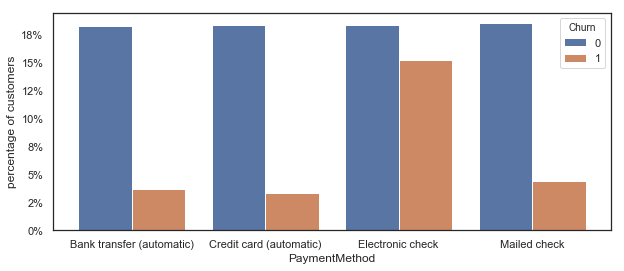

In [11]:
def barplot_percentages(feature, axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g)
    ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    ax.plot()
plt.figure(figsize=(10, 4))
barplot_percentages("PaymentMethod")

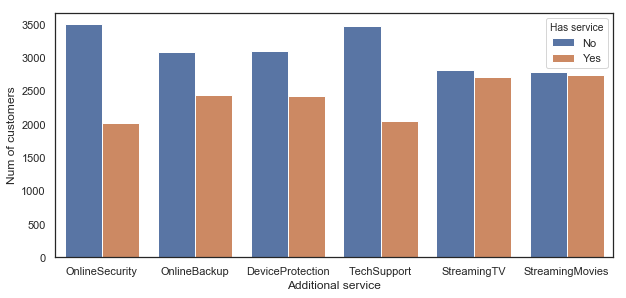

In [12]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

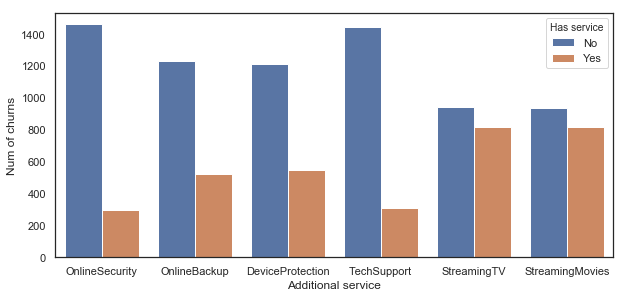

<Figure size 648x324 with 0 Axes>

<Figure size 648x324 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 4.5))
df1 = df[(df.InternetService != 'No') & (df.Churn == 1)]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()
plt.figure(figsize=(9, 4.5))

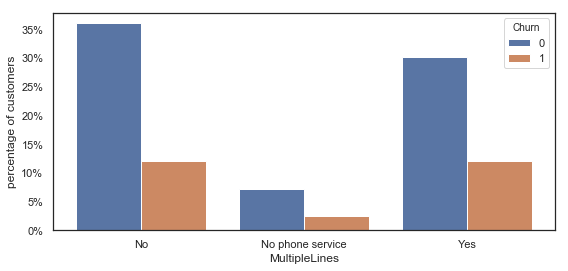

In [15]:
plt.figure(figsize=(9, 4))
barplot_percentages("MultipleLines")

C:\Users\Eeshan\Anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


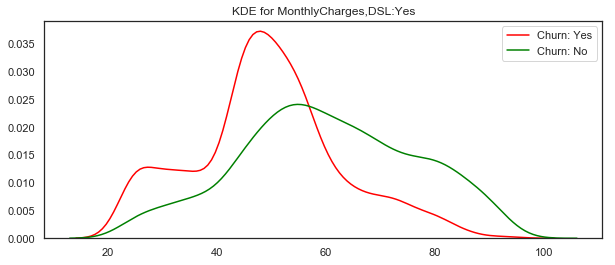

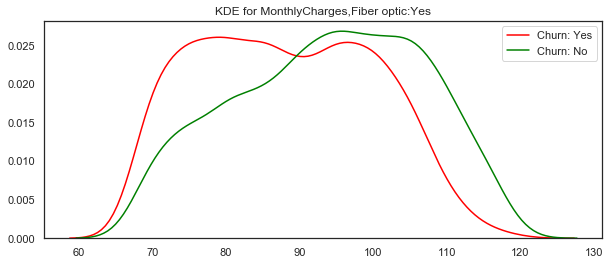

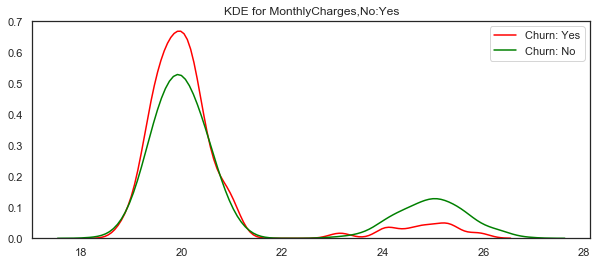

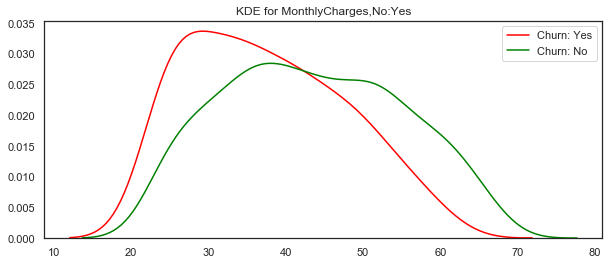

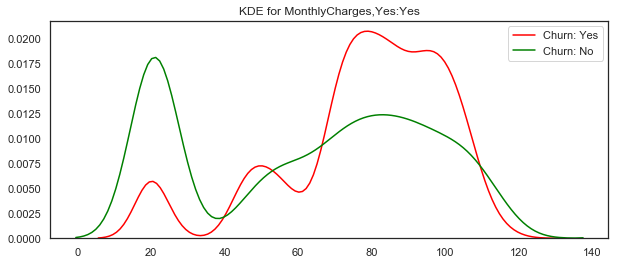

In [17]:
def subcat(feature):
    l = df[feature].unique().tolist()
    f = df[feature].tolist()
    for i in l:
        df[i]='No'
        for j in range(len(f)):
            if(f[j] == i):
                df.ix[[j],[i]] = 'Yes'
        kdegen(param = 'MonthlyCharges',binc = i,choice = 'Yes')
subcat('InternetService')
subcat('PhoneService')

Even though Linear pearson coefficient correlation might not be best approach for this classification task, and either logistic regression or decision tree should be used, just to get a general idea of correlation between certain parameters, this has been done.

In [45]:
import numpy as np
def pearson(anum,bnum):
    Nr = 0
    Dr = 1
    siga = 0
    sigb = 0
    a = df[anum].to_numpy()
    b = df[bnum].to_numpy()
    for i in range(len(a)):
        Nr+=(a[i]-np.mean(a))*(b[i]-np.mean(b))
        siga+=np.square(a[i]-np.mean(a))
        sigb+=np.square(b[i]-np.mean(b))
    Dr = np.sqrt(siga*sigb)
    r = Nr/Dr
    return(r)
print(pearson('tenure','TotalCharges'))
r = pearson('Churn','PaperlessBilling')
print(r)

0.826178397902154
0.19182533166644541


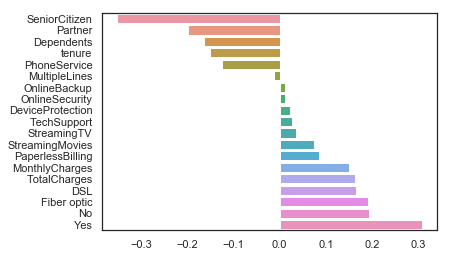

In [58]:
temp = 0
yax = []
xax = []
for i in df.columns:
    if((type(df[i][0])!= str) and (i != 'Churn')):
        xax.append(i)
        yax.append(pearson('Churn',i))
importance = yax
yax.sort()
for i in range(0,len(importance)):
    for j in range(0,len(yax)):
        if(importance[i]==yax[j]):
            temp = xax[j]
            xax[j] = xax[i]
            xax[i] = temp
            i+=1
sns.barplot(y = xax,x = yax)

TypeError: unsupported operand type(s) for /: 'str' and 'int'